<a href="https://colab.research.google.com/github/jamieth0405/MAT421/blob/main/Module_B_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 3 - Jamie Dinh

17.4 Lagrange Polynomial Interpolation

- Rather than using Cubic Spline Interpolation to find different polynomials that pass through a set of pairs of data points, Lagrange Polynomial Interpolation constructs a single polynomial that passes through all given data points exactly.
- This polynomial, called the **Lagrange Polynomial** 𝐿(𝒙), is formed as a linear combination of Lagrange basis polynomials 𝑃ᵢ(𝒙), ensuring that: 𝐿(𝒙ᵢ) = 𝒚ᵢ for every data point (𝒙ᵢ, 𝒚ᵢ).
- Each basis polynomial 𝑃ᵢ(𝒙) is defined as:
$$ P_i(x) = \prod_{j=1, j \neq i}^{n} \frac{x - x_j}{x_i - x_j} $$



In Python, we can use numpy.polynomial.polynomial to compute and visualize Lagrange interpolation:

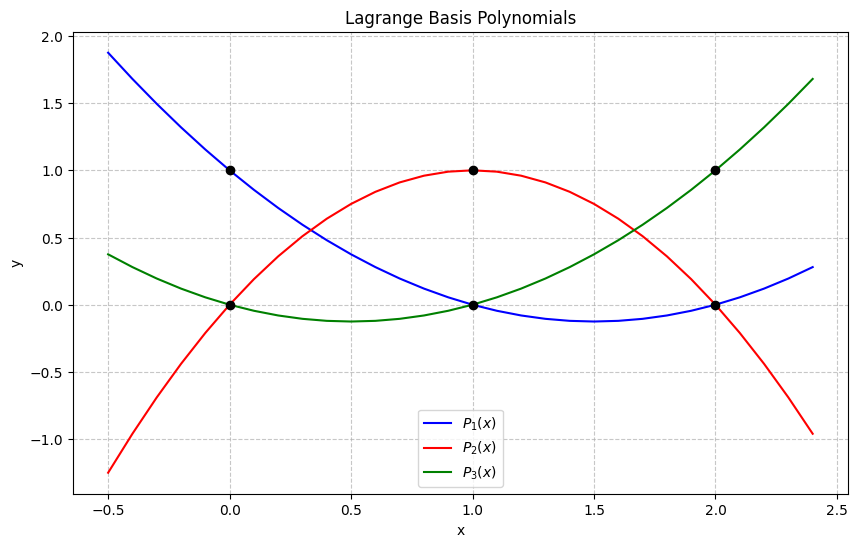

In [2]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

# Define data points
x = [0, 1, 2]
y = [1, 3, 2]

# Define Lagrange basis polynomial coefficients
P1_coeff = [1, -1.5, 0.5]  # P1(x) = 1/2 (x^2 - 3x + 2)
P2_coeff = [0, 2, -1]       # P2(x) = -x^2 + 2x
P3_coeff = [0, -0.5, 0.5]   # P3(x) = 1/2 (x^2 - x)

# Get the polynomial functions
P1 = poly.Polynomial(P1_coeff)
P2 = poly.Polynomial(P2_coeff)
P3 = poly.Polynomial(P3_coeff)

# Generate x values for smooth curves
x_new = np.arange(-0.5, 2.5, 0.1)

# Create figure
fig = plt.figure(figsize=(10, 6))

# Plot basis polynomials
plt.plot(x_new, P1(x_new), 'b', label='$P_1(x)$')
plt.plot(x_new, P2(x_new), 'r', label='$P_2(x)$')
plt.plot(x_new, P3(x_new), 'g', label='$P_3(x)$')

# Plot original data points at 1 and 0 for verification
plt.plot(x, np.ones(len(x)), 'ko', x, np.zeros(len(x)), 'ko')

# Labels and title
plt.title('Lagrange Basis Polynomials')
plt.xlabel('x')
plt.ylabel('y')

# Grid and legend
plt.grid(linestyle='--', alpha=0.7)
plt.legend()

# Show plot
plt.show()

Now we can compute and plot the Lagrange polynomial to verify that it goes through all data points:


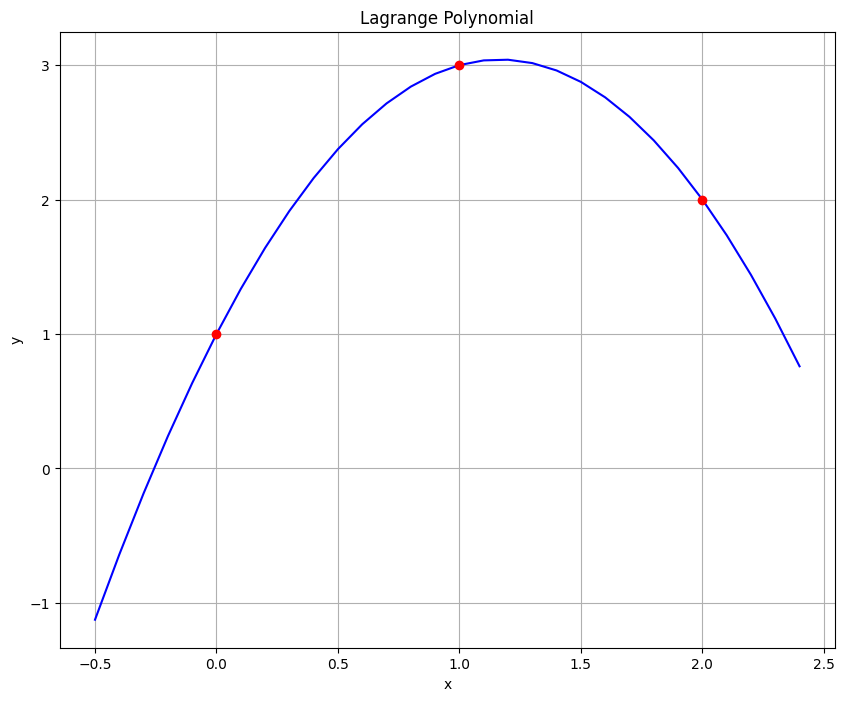

In [4]:
L = P1 + 3 * P2 + 2 * P3
fig = plt.figure(figsize = (10,8))
plt.plot(x_new, L(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Or we can use Lagrange from Scipy:


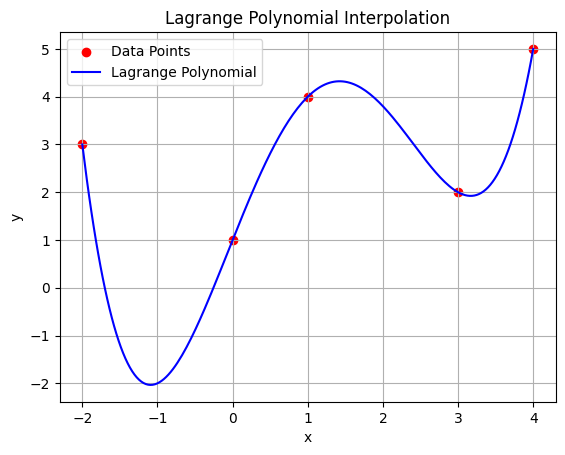

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

# New data points (5 pairs)
x = np.array([-2, 0, 1, 3, 4])
y = np.array([3, 1, 4, 2, 5])

# Compute Lagrange polynomial
poly = lagrange(x, y)

# Generate x values for smooth curve
x_fine = np.linspace(min(x), max(x), 200)
y_fine = poly(x_fine)

# Plot data points
plt.scatter(x, y, color = 'red', label = 'Data Points')

# Plot Lagrange polynomial curve
plt.plot(x_fine, y_fine, color = 'blue', label = 'Lagrange Polynomial')

# Labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lagrange Polynomial Interpolation')
plt.legend()
plt.grid()

# Show plot
plt.show()

17.5 Newton’s Polynomial Interpolation

- Newton’s Polynomial Interpolation is also a method used to construct a polynomial that passes through a given set of data points.
- It is an alternative to Lagrange Interpolation and is particularly useful because it allows for efficient computation when adding new data points.
- The Newton interpolating polynomial is given by:
$$f(x) = a_0 + a_1(x - x_0) + a_2(x - x_0)(x - x_1) + \dots + a_n(x - x_0)(x - x_1) \dots (x - x_{n})$$
where the coefficients aᵢ are computed using divided differences.
- The divided differences are computed recursively as:
$$
f[x_i, x_{i+1}] = \frac{f(x_{i+1}) - f(x_i)}{x_{i+1} - x_i}
$$
and
$$
f[x_0, x_1, x_2] = \frac{f[x_2, x_1] - f[x_1, x_0]}{x_2 - x_1}
$$
- The divided differences can be arranged in a table, making it easy to compute and update the polynomial when new points are added.





Here is a Python example implementing Newton’s Polynomial Interpolation using the Divided Differences Method:

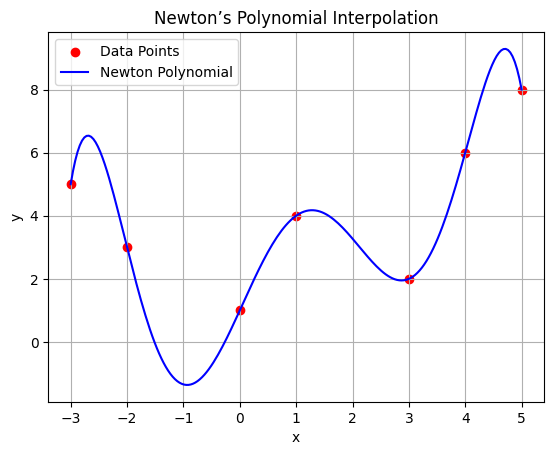

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def divided_diff(x, y):
    """
    Computes the divided differences table.
    Returns the first row which contains the coefficients.
    """
    n = len(y)
    coef = np.zeros([n, n])
    coef[:, 0] = y  # First column is y values

    for j in range(1, n):
        for i in range(n - j):
            coef[i][j] = (coef[i + 1][j - 1] - coef[i][j - 1]) / (x[i + j] - x[i])

    return coef[0, :]  # First row contains the coefficients

def newton_poly(coef, x_data, x):
    """
    Evaluates the Newton polynomial at given x values.
    """
    n = len(x_data) - 1
    p = coef[n]

    for k in range(1, n + 1):
        p = coef[n - k] + (x - x_data[n - k]) * p

    return p

# Given more data points
x_data = np.array([-3, -2, 0, 1, 3, 4, 5])  # More x-values
y_data = np.array([5, 3, 1, 4, 2, 6, 8])   # Corresponding y-values

# Compute divided differences coefficients
coef = divided_diff(x_data, y_data)

# Generate new x values for smooth curve
x_fine = np.linspace(min(x_data), max(x_data), 200)
y_fine = newton_poly(coef, x_data, x_fine)

# Plot data points
plt.scatter(x_data, y_data, color='red', label='Data Points')

# Plot Newton interpolating polynomial
plt.plot(x_fine, y_fine, color='blue', label='Newton Polynomial')

# Labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Newton’s Polynomial Interpolation')
plt.legend()
plt.grid()

# Show plot
plt.show()


Given the data points, it can be seen that Newton's polynomial function fits all points perfectly and smoothly. It demonstrates how Newton’s method can handle more data while remaining efficient.